<a href="https://colab.research.google.com/github/chenkham/Deep-learning-projects/blob/main/Deeplearning_MNIST_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST handwritten digit classification using Deep learning(Neural Network)

importing the dependencies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
from  google.colab.patches import cv2_imshow
from PIL import Image
import os
import pandas as pd
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the mnist dataset from keras dataset

In [ ]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
#shape of the numpy arrays
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


training data = 60000
test data = 10000
pixels = 28*28
color channel ---> grey (1 channel)

In [ ]:
#10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

3


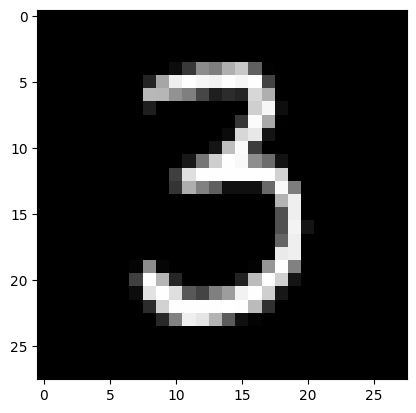

In [ ]:
plt.imshow(X_train[50],cmap='gray')

#label
print(Y_train[50])

In [ ]:
#unique values
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
#unique values
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]


can use one hot encoding also

all images are in same dimension if not then we have to resize it

In [ ]:
#scaling the values
X_train=X_train/255
X_test=X_test/255

In [ ]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the neural network (CNN)

In [ ]:
#layer of neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(60,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#compiling the NN
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#training the neural network
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8552 - loss: 0.5013
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9571 - loss: 0.1450
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9686 - loss: 0.1023
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9760 - loss: 0.0781
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9808 - loss: 0.0626
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9841 - loss: 0.0514
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9865 - loss: 0.0443
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9893 - loss: 0.0361
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9889 - loss: 0.0331
Epoch 10/10
1667/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9899 - loss: 0.0295

training data accuracy 99.1%

#Accuracy on test data

In [ ]:
loss,accuracy = model.evaluate(X_test,Y_test)
print(accuracy)

test data accuracy 99.1%

In [ ]:
print(X_test.shape)

In [ ]:
#first data point is X_test
plt.imshow(X_test[0],cmap='gray')


In [ ]:
print(Y_test[0])

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
print(Y_pred.shape)

In [ ]:
print(Y_pred[0])

model.predict() gives probability for each classes 0-9

In [ ]:
#converting the probability to label
label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

In [ ]:
#converting for all
Y_pred_label = [np.argmax(i) for i in Y_pred]
print(Y_pred_label)

In [ ]:
print(Y_test)

Y_test --> ture labels
Y_pred_label --> predict

In [ ]:
con_mat = confusion_matrix(Y_test,Y_pred_label)
print(con_mat)

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(con_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')

In [ ]:
# !wget 'https://machinelearningmastery.com/wp-content/uploads/2019/02/sample_image.png'

In [ ]:
input_image_path = '/content/seven.png'
input_image = cv.imread(input_image_path)

In [ ]:
input_image.shape

In [ ]:
type(input_image)

In [ ]:
print(input_image)

In [ ]:
# cv2_imshow(input_image)

In [ ]:
input_image_resize = cv.resize(input_image,(28,28))

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
grey = cv.cvtColor(input_image_resize,cv.COLOR_RGB2GRAY)

In [ ]:
plt.imshow(grey,cmap='gray')

In [ ]:
grey.shape

In [ ]:
input_image_resize = grey/255

In [ ]:
image = input_image_resize.reshape(1,28,28)

In [ ]:
predict_image = model.predict(image)
print(predict_image)

In [ ]:
predict_image_label = np.argmax(predict_image)
print(predict_image_label)